In [452]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [453]:
# Params
n = 2000
f_true = lambda X: X[:,1] + 2*X[:,0] #np.square((X[:,0] + X[:,1]))*2/12.901058
# Generate Data
X = np.matrix(np.random.randn(2*n, 2))
# Remove outliers
ind_not_outlier = np.array(np.multiply((abs(X) < 3)[:,0], (abs(X) < 3)[:,1]).T)[0]
X = X[ind_not_outlier, :][0:n, :]
# square elements of X
X = np.power(X, 2)
Y = f_true(X) + np.random.randn(n, 1)/3

In [454]:
def trim(X, percent):
    
    alpha = (1 - percent)/2
    n, k = np.shape(X)
    t_ind = np.zeros((n, k))
    
    for i in range(0, k):
        upper_bd = np.percentile(X[:,i], (1 - alpha)*100)
        lower_bd = np.percentile(X[:,i], (alpha)*100)
        t_ind[:, i] = [int(lower_bd < x < upper_bd) for x in X[:,i]]
        
    return np.prod(t_ind, axis = 1)

def pdfn(x):
    return np.exp(-np.multiply(x, x)/2)/np.sqrt(2*np.pi)

# Conditional Expecttation
def CE_1(Y, X, arg, r):
    
    n_arg = np.shape(arg)[0]
    n = np.shape(X)[0]
    h = (n**(-r)) * np.std(X, axis = 0, ddof = 1)
    e = np.zeros((n, 1))
    
    for j in range(0, n_arg):
        k = np.divide(pdfn(np.divide((arg[j] - X), h)), h)
        k = np.prod(k, axis = 1)   
        e[j] = (Y.T*k/n)/np.mean(k)
        
    return e

def SLS_1(b, Y, X, X_ind):
    
    v = X[:, 0]*b[0] + X[:, 1]*b[1]
    EY = CE_1(Y, v, v, 1/5)
    residual = np.power((Y - EY), 2)
    
    return (-0.5 * np.matrix(X_ind)*residual)

In [463]:
from scipy.optimize import minimize
obj_f = lambda x_0: -SLS_1(x_0, Y, X, trim(X, 0.98))
result = minimize(obj_f, [1,2], method='SLSQP', options={'ftol': 10**-2})
result

     fun: 137.1990263379913
     jac: array([ 0.18494797, -0.36907578])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([4.76170648, 2.38607766])

In [464]:
v_hat = X*np.matrix(result.x).T
#CE_1(Y, v_hat, v_hat, 1/5)
result.x[0] / result.x[1]

1.995620915778717

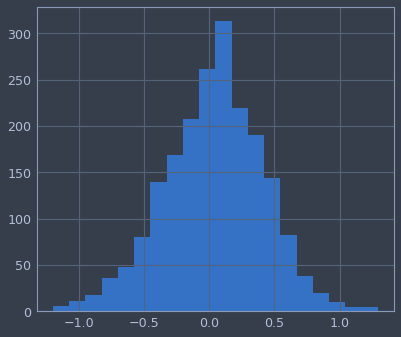

In [465]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
plt.hist(Y - CE_1(Y, v_hat, v_hat, 1/5), bins = 20);

1e-10